In [1]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [2]:
# Keras

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.utils.vis_utils import model_to_dot

from IPython.display import SVG
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers

Using TensorFlow backend.


In [ ]:
# show all columns
pd.set_option('display.max_columns', None)
# Set style
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [572]:
airbnb = pd.read_csv('./Airbnb/listings_new_2_distr.csv')
airbnb = airbnb.drop(columns=['Unnamed: 0'])

details = pd.read_csv('./Airbnb/details_needed.csv')
details = details.drop(columns=['Unnamed: 0'])

#airbnb_scaled = pd.read_csv('./Airbnb/airbnb_scaled.csv')
#airbnb_scaled = airbnb_scaled.drop(columns=['Unnamed: 0'])


In [567]:
pol = pd.read_csv('./Airbnb/pol_ap.csv')
pol = pol.drop(columns=['Unnamed: 0'])
pol.head()

,id,polarity
0,2818,0.377925
1,3209,0.421428
2,20168,0.336916
3,25428,0.506875
4,27886,0.447814


In [568]:
airbnb = details.merge(airbnb, on='id')

In [569]:
airbnb.head(1)

,id,description,description_lenght,host_id,neighbourhood,latitude,longitude,price,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,district
0,2818,Quiet Garden View Room & Super Fast WiFi I'm r...,1000.0,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,59,2008-09-24,within an hour,100.0,t,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",100.0,50.0,1,20.0,3,15,today,17,44,44,44,248,2009-03-30,2018-11-28,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,strict_14_with_grace_period,f,f,1,2.1,Amsterdam-Oost


In [548]:
airbnb_pol = pol.merge(airbnb, on='id')

In [552]:
airbnb_pol.head(1)

,id,polarity,description,description_lenght,host_id,neighbourhood,latitude,longitude,price,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,district
0,2818,0.377925,Quiet Garden View Room & Super Fast WiFi I'm r...,1000.0,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,59,2008-09-24,within an hour,100.0,t,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",100.0,50.0,1,20.0,3,15,today,17,44,44,44,248,2009-03-30,2018-11-28,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,strict_14_with_grace_period,f,f,1,2.1,Amsterdam-Oost


In [553]:
airbnb_pol.shape

(17336, 55)

0.298625482061993

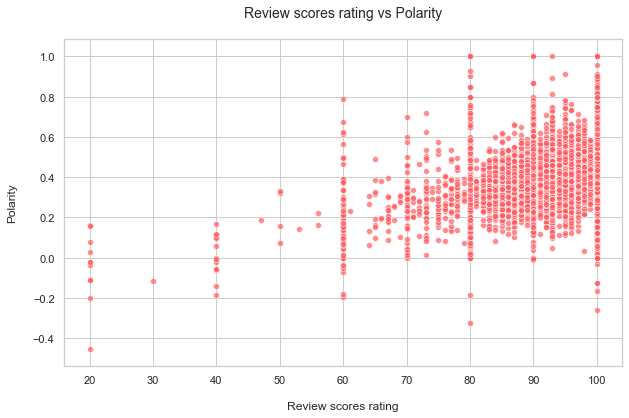

In [558]:
#airbnb_model['review_scores_rating'].corr(airbnb_model['polarity'])
plt.figure(figsize=(10,6))
sns.scatterplot(x="review_scores_rating", y="polarity", data=airbnb_pol,facecolor='#FF5A5F', alpha=0.7)
plt.ylabel('Polarity\n')
plt.xlabel('\nReview scores rating')
plt.title('Review scores rating vs Polarity\n', fontsize=14)
airbnb_pol['review_scores_rating'].corr(airbnb_pol['polarity'])


Text(0.5, 1.0, 'Review scores rating distribution\n')

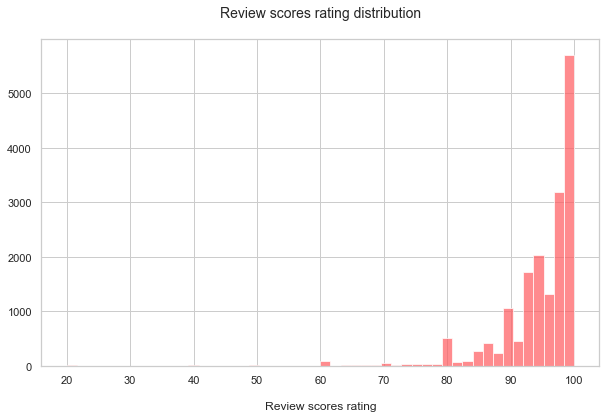

In [573]:
#sns.distplot(airbnb_model['review_scores_rating'],bins=50, color='#FF5A5F')
plt.figure(figsize=(10,6))
plt.hist(airbnb['review_scores_rating'],bins=50, color='#FF5A5F', alpha=0.7)
plt.ylabel('')
plt.xlabel('\nReview scores rating')
plt.title('Review scores rating distribution\n', fontsize=14)

# Prepare data

In [461]:
airbnb_model = airbnb.drop(columns=['id', 'description', 'host_id', 'host_verifications', 'calendar_updated',
                                   'district', 'host_response_time', 'host_response_rate', 'review_scores_accuracy',
                                   'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                                   'review_scores_location', 'review_scores_value'])

In [416]:
airbnb.host_response_time.value_counts()

within an hour        5113
within a few hours    2708
within a day          2408
a few days or more     318
Name: host_response_time, dtype: int64

In [417]:
#plt.figure(figsize=(16, 10))
#sns.heatmap(airbnb_model.corr())

In [462]:
# Drop because of high collinerity
airbnb_model = airbnb_model.drop(columns=['host_total_listings_count', 'calculated_host_listings_count','availability_60'])

In [463]:
#plt.figure(figsize=(16, 10))
#sns.heatmap(airbnb_model.corr())

In [464]:
# Select features
"""
airbnb_model = airbnb[['price', 'description_lenght', 'accommodates', 'property_type', 
                       'room_type',  'bedrooms', 'neighbourhood', 'cleaning_fee', 'extra_people',
                       'security_deposit', 'minimum_nights',
                       'availability_90', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
                       'review_scores_cleanliness',
                       'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                       'review_scores_value', 'cancellation_policy', 'instant_bookable', 'host_response_time',
                       'host_response_rate', 'host_is_superhost', 'host_identity_verified', 'host_total_listings_count']]

"""

"\nairbnb_model = airbnb[['price', 'description_lenght', 'accommodates', 'property_type', \n                       'room_type',  'bedrooms', 'neighbourhood', 'cleaning_fee', 'extra_people',\n                       'security_deposit', 'minimum_nights',\n                       'availability_90', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', \n                       'review_scores_cleanliness',\n                       'review_scores_checkin', 'review_scores_communication', 'review_scores_location', \n                       'review_scores_value', 'cancellation_policy', 'instant_bookable', 'host_response_time',\n                       'host_response_rate', 'host_is_superhost', 'host_identity_verified', 'host_total_listings_count']]\n\n"

In [465]:

airbnb_model.description_lenght.fillna(0, inplace=True)
airbnb_model.bathrooms.fillna(0, inplace=True)
airbnb_model.bedrooms.fillna(0, inplace=True)
airbnb_model.security_deposit.fillna(0, inplace=True)
airbnb_model.cleaning_fee.fillna(0, inplace=True)
airbnb_model.review_scores_rating.fillna(0, inplace=True)
airbnb_model.first_review.fillna(0, inplace=True)
airbnb_model.last_review.fillna(0, inplace=True)
airbnb_model.review_scores_rating.fillna(0, inplace=True)
airbnb_model.reviews_per_month.fillna(0, inplace=True)


In [466]:
airbnb_model.shape

(20030, 37)

In [467]:
airbnb_model = airbnb_model.dropna()
airbnb_model.shape

(20019, 37)

In [468]:
#airbnb_model.isnull().sum()

In [469]:
airbnb_model.head()

,description_lenght,neighbourhood,latitude,longitude,price,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,1000.0,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,59,2008-09-24,t,1.0,t,f,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",100.0,50.0,1,20.0,3,15,17,44,44,248,2009-03-30,2018-11-28,97.0,t,strict_14_with_grace_period,f,f,2.10
1,1000.0,Westerpark,52.390225,4.873924,160,2008-10-24,f,1.0,t,t,t,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",300.0,40.0,2,15.0,4,20,0,0,47,42,2015-07-31,2018-08-29,96.0,f,moderate,f,f,1.03
2,1000.0,Centrum-Oost,52.365087,4.893541,80,2009-12-02,f,2.0,t,f,t,Townhouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",0.0,0.0,2,0.0,1,1000,0,24,198,233,2010-03-02,2018-11-30,87.0,f,strict_14_with_grace_period,f,f,2.18
3,1000.0,Centrum-West,52.373114,4.883668,125,2009-11-20,f,2.0,t,f,f,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",300.0,40.0,2,10.0,14,60,2,44,141,1,2018-01-21,2018-01-21,100.0,f,strict_14_with_grace_period,f,f,0.09
4,1000.0,Centrum-West,52.386727,4.892078,150,2010-03-23,t,1.0,t,t,t,Houseboat,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",0.0,0.0,1,0.0,2,730,16,54,199,171,2012-01-09,2018-11-25,99.0,t,strict_14_with_grace_period,f,f,2.03


In [470]:
# Convert to int
airbnb_model[['description_lenght', 'host_listings_count', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'extra_people']] = airbnb_model[['description_lenght', 'host_listings_count', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'extra_people']].astype(int)
airbnb_model[['review_scores_rating', 'reviews_per_month']] = airbnb_model[['review_scores_rating', 'reviews_per_month']].astype(int)

# Convert datetime to ordinal

from datetime import datetime as dt

airbnb_model['host_since'] = pd.to_datetime(airbnb_model['host_since'])
airbnb_model['host_since'] = airbnb_model['host_since'].apply(lambda x: x.toordinal())

airbnb_model['first_review'] = pd.to_datetime(airbnb_model['first_review'])
airbnb_model['first_review'] = airbnb_model['first_review'].apply(lambda x: x.toordinal())

airbnb_model['last_review'] = pd.to_datetime(airbnb_model['last_review'])
airbnb_model['last_review'] = airbnb_model['last_review'].apply(lambda x: x.toordinal())


#airbnb_model.dtypes

In [471]:
col = 'property_type'

conditions = [airbnb_model[col] == 'Apartment', airbnb_model[col] == 'Townhouse',
             airbnb_model[col] == 'Houseboat', airbnb_model[col] == 'Bed and breakfast',
             airbnb_model[col] == 'Boat', airbnb_model[col] == 'Guest suite',
             airbnb_model[col] == 'Loft', airbnb_model[col] == 'Serviced apartment',
             airbnb_model[col] == 'House', airbnb_model[col] == 'Other',
             airbnb_model[col] == 'Condominium', airbnb_model[col] == 'Aparthotel']

choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

airbnb_model["property_type"] = np.select(conditions, choices, default=np.nan)

In [472]:
col = 'room_type'

conditions = [airbnb_model[col] == 'Private room', airbnb_model[col] == 'Entire home/apt',
             airbnb_model[col] == 'Shared room']

choices = [1, 2, 3]

airbnb_model["room_type"] = np.select(conditions, choices, default=np.nan)

In [473]:
col = 'bed_type'

conditions = [airbnb_model[col] == 'Real Bed', airbnb_model[col] == 'Futon',
             airbnb_model[col] == 'Pull-out Sofa', airbnb_model[col] == 'Airbed',
             airbnb_model[col] == 'Couch']

choices = [1, 2, 3, 4, 5]

airbnb_model["bed_type"] = np.select(conditions, choices, default=np.nan)

In [474]:
col = 'instant_bookable'

conditions = [airbnb_model[col] == 't', airbnb_model[col] == 'f']

choices = [1, 0]

airbnb_model["instant_bookable"] = np.select(conditions, choices, default=np.nan)

In [475]:
col = 'cancellation_policy'

conditions = [airbnb_model[col] == 'strict_14_with_grace_period', airbnb_model[col] == 'moderate',
             airbnb_model[col] == 'flexible', airbnb_model[col] == 'super_strict_60']

choices = [1, 2, 3, 4]

airbnb_model["cancellation_policy"] = np.select(conditions, choices, default=np.nan)

In [476]:
col = 'neighbourhood'

conditions = [airbnb_model[col] == 'Oostelijk Havengebied - Indische Buurt', airbnb_model[col] == 'Westerpark',
             airbnb_model[col] == 'Centrum-Oost', airbnb_model[col] == 'Centrum-West',
             airbnb_model[col] == 'Bos en Lommer', airbnb_model[col] == 'Zuid',
             airbnb_model[col] == 'De Pijp - Rivierenbuurt', airbnb_model[col] == 'De Baarsjes - Oud-West',
             airbnb_model[col] == 'Oud-Oost', airbnb_model[col] == 'Slotervaart',
             airbnb_model[col] == 'Gaasperdam - Driemond', airbnb_model[col] == 'Oud-Noord',
             
             airbnb_model[col] == 'Noord-Oost', airbnb_model[col] == 'Watergraafsmeer',
             airbnb_model[col] == 'IJburg - Zeeburgereiland', airbnb_model[col] == 'Geuzenveld - Slotermeer',
             airbnb_model[col] == 'Buitenveldert - Zuidas', airbnb_model[col] == 'Bijlmer-Oost',
             airbnb_model[col] == 'Noord-West', airbnb_model[col] == 'De Aker - Nieuw Sloten',
             airbnb_model[col] == 'Osdorp', airbnb_model[col] == 'Bijlmer-Centrum']

choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

airbnb_model["neighbourhood"] = np.select(conditions, choices, default=np.nan)

In [477]:
col = 'host_is_superhost'

conditions = [airbnb_model[col] == 't', airbnb_model[col] == 'f']

choices = [1, 0]

airbnb_model["host_is_superhost"] = np.select(conditions, choices, default=np.nan)

In [478]:
col = 'host_has_profile_pic'

conditions = [airbnb_model[col] == 't', airbnb_model[col] == 'f']

choices = [1, 0]

airbnb_model["host_has_profile_pic"] = np.select(conditions, choices, default=np.nan)

In [479]:
col = 'host_identity_verified'

conditions = [airbnb_model[col] == 't', airbnb_model[col] == 'f']

choices = [1, 0]

airbnb_model["host_identity_verified"] = np.select(conditions, choices, default=np.nan)

In [480]:
col = 'is_location_exact'

conditions = [airbnb_model[col] == 't', airbnb_model[col] == 'f']

choices = [1, 0]

airbnb_model["is_location_exact"] = np.select(conditions, choices, default=np.nan)

In [481]:
col = 'require_guest_profile_picture'

conditions = [airbnb_model[col] == 't', airbnb_model[col] == 'f']

choices = [1, 0]

airbnb_model["require_guest_profile_picture"] = np.select(conditions, choices, default=np.nan)

In [482]:
col = 'require_guest_phone_verification'

conditions = [airbnb_model[col] == 't', airbnb_model[col] == 'f']

choices = [1, 0]

airbnb_model["require_guest_phone_verification"] = np.select(conditions, choices, default=np.nan)

In [483]:
airbnb_model.head()

,description_lenght,neighbourhood,latitude,longitude,price,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,1000,1.0,52.365755,4.941419,59,733309,1.0,1,1.0,0.0,0.0,1.0,1.0,2,1,1,2,1.0,"{Internet,Wifi,""Paid parking off premises"",""Bu...",100,50,1,20,3,15,17,44,44,248,733496,737026,97,1.0,1.0,0.0,0.0,2
1,1000,2.0,52.390225,4.873924,160,733339,0.0,1,1.0,1.0,1.0,1.0,2.0,5,1,2,2,1.0,"{Internet,Wifi,Kitchen,""Paid parking off premi...",300,40,2,15,4,20,0,0,47,42,735810,736935,96,0.0,2.0,0.0,0.0,1
2,1000,3.0,52.365087,4.893541,80,733743,0.0,2,1.0,0.0,1.0,2.0,2.0,2,1,1,1,1.0,"{TV,Internet,Wifi,""Paid parking off premises"",...",0,0,2,0,1,1000,0,24,198,233,733833,737028,87,0.0,1.0,0.0,0.0,2
3,1000,4.0,52.373114,4.883668,125,733731,0.0,2,1.0,0.0,0.0,1.0,2.0,3,1,1,1,1.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Elevator,...",300,40,2,10,14,60,2,44,141,1,736715,736715,100,0.0,1.0,0.0,0.0,0
4,1000,4.0,52.386727,4.892078,150,733854,1.0,1,1.0,1.0,1.0,3.0,1.0,2,1,1,1,1.0,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",0,0,1,0,2,730,16,54,199,171,734511,737023,99,1.0,1.0,0.0,0.0,2


In [484]:
airbnb_model[['neighbourhood', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
              'is_location_exact', 'property_type', 'room_type', 'bed_type', 'instant_bookable',
             'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']] = airbnb_model[['neighbourhood', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
                                                                                                                          'is_location_exact', 'property_type', 'room_type', 'bed_type', 'instant_bookable',
                                                                                                                         'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']].astype(int)

#airbnb_model.dtypes


##### Amenities

In [485]:
amenities_lst = list(airbnb_model.amenities)
amenities_str = ' '.join(amenities_lst)
amenities_str = amenities_str.replace('{','')
amenities_str = amenities_str.replace('}','')
amenities_str = amenities_str.replace('"','')
amenities_list = [x.strip() for x in amenities_str.split(',')]
set(amenities_list)

amenities = ['Air conditioning', 'Private entrance' 'Breakfast', 'Elevator', 'Essentials', 'Patio or balcony', 'Internet', 'Lockbox', 'Waterfront', 'Washer', '24-hour check-in', 'Kitchen', 'Garden or backyard']

In [486]:
airbnb_model['Private_entrance'] = np.where(airbnb_model['amenities'].str.contains('Private entrance'), 1, 0)
airbnb_model['Breakfast'] = np.where(airbnb_model['amenities'].str.contains('Breakfast'), 1, 0)
airbnb_model['Elevator'] = np.where(airbnb_model['amenities'].str.contains('Elevator'), 1, 0)
airbnb_model['Patio_or_balcony'] = np.where(airbnb_model['amenities'].str.contains('Patio or balcony'), 1, 0)
airbnb_model['Wifi'] = np.where(airbnb_model['amenities'].str.contains('Wifi'), 1, 0)
airbnb_model['Washer'] = np.where(airbnb_model['amenities'].str.contains('Washer'), 1, 0)
airbnb_model['24_hour_check_in'] = np.where(airbnb_model['amenities'].str.contains('24-hour check-in'), 1, 0)
airbnb_model['Kitchen'] = np.where(airbnb_model['amenities'].str.contains('Kitchen'), 1, 0)
airbnb_model['Garden_or_backyard'] = np.where(airbnb_model['amenities'].str.contains('Garden or backyard'), 1, 0)
airbnb_model['TV'] = np.where(airbnb_model['amenities'].str.contains('TV'), 1, 0)
airbnb_model['Bed_linens'] = np.where(airbnb_model['amenities'].str.contains('Bed linens'), 1, 0)

airbnb_model['Air_conditioning'] = np.where(airbnb_model['amenities'].str.contains('Air conditioning'), 1, 0)
airbnb_model['Essentials'] = np.where(airbnb_model['amenities'].str.contains('Essentials'), 1, 0)
airbnb_model['Lockbox'] = np.where(airbnb_model['amenities'].str.contains('Lockbox'), 1, 0)
airbnb_model['Waterfront'] = np.where(airbnb_model['amenities'].str.contains('Waterfront'), 1, 0)


In [487]:
airbnb_model = airbnb_model.drop(columns='amenities')

In [488]:
airbnb_model.shape

(20019, 51)

In [489]:
airbnb_model['Wifi'].value_counts()

1    19459
0      560
Name: Wifi, dtype: int64

In [490]:
airbnb_model.head()

,description_lenght,neighbourhood,latitude,longitude,price,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,Private_entrance,Breakfast,Elevator,Patio_or_balcony,Wifi,Washer,24_hour_check_in,Kitchen,Garden_or_backyard,TV,Bed_linens,Air_conditioning,Essentials,Lockbox,Waterfront
0,1000,1,52.365755,4.941419,59,733309,1,1,1,0,0,1,1,2,1,1,2,1,100,50,1,20,3,15,17,44,44,248,733496,737026,97,1,1,0,0,2,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0
1,1000,2,52.390225,4.873924,160,733339,0,1,1,1,1,1,2,5,1,2,2,1,300,40,2,15,4,20,0,0,47,42,735810,736935,96,0,2,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0
2,1000,3,52.365087,4.893541,80,733743,0,2,1,0,1,2,2,2,1,1,1,1,0,0,2,0,1,1000,0,24,198,233,733833,737028,87,0,1,0,0,2,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
3,1000,4,52.373114,4.883668,125,733731,0,2,1,0,0,1,2,3,1,1,1,1,300,40,2,10,14,60,2,44,141,1,736715,736715,100,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0
4,1000,4,52.386727,4.892078,150,733854,1,1,1,1,1,3,1,2,1,1,1,1,0,0,1,0,2,730,16,54,199,171,734511,737023,99,1,1,0,0,2,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0


In [491]:
#plt.figure(figsize=(16, 16))
#sns.heatmap(airbnb_model.corr())

In [492]:
airbnb_model = airbnb_model.drop(columns=['first_review', 'last_review', 'latitude', 'longitude', 
                                          'host_has_profile_pic', 'maximum_nights'])

In [493]:
airbnb_model['Breakfast'].corr(airbnb_model['price'])

-0.011805280191298013

In [494]:
airbnb_model.Waterfront.value_counts()

0    19259
1      760
Name: Waterfront, dtype: int64

In [495]:
airbnb_model.head()

,description_lenght,neighbourhood,price,host_since,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,Private_entrance,Breakfast,Elevator,Patio_or_balcony,Wifi,Washer,24_hour_check_in,Kitchen,Garden_or_backyard,TV,Bed_linens,Air_conditioning,Essentials,Lockbox,Waterfront
0,1000,1,59,733309,1,1,0,0,1,1,2,1,1,2,1,100,50,1,20,3,17,44,44,248,97,1,1,0,0,2,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0
1,1000,2,160,733339,0,1,1,1,1,2,5,1,2,2,1,300,40,2,15,4,0,0,47,42,96,0,2,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0
2,1000,3,80,733743,0,2,0,1,2,2,2,1,1,1,1,0,0,2,0,1,0,24,198,233,87,0,1,0,0,2,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
3,1000,4,125,733731,0,2,0,0,1,2,3,1,1,1,1,300,40,2,10,14,2,44,141,1,100,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0
4,1000,4,150,733854,1,1,1,1,3,1,2,1,1,1,1,0,0,1,0,2,16,54,199,171,99,1,1,0,0,2,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0


In [496]:
airbnb_model['review_scores_rating'].corr(airbnb_model['polarity'])

sns.scatterplot(x="review_scores_rating", y="polarity", hue="neighbourhood", data=airbnb_model)

KeyError: 'polarity'

# Remove outliers

In [453]:
airbnb_model.head()

,polarity,description_lenght,neighbourhood,price,host_since,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,Private_entrance,Breakfast,Elevator,Patio_or_balcony,Wifi,Washer,24_hour_check_in,Kitchen,Garden_or_backyard,TV,Bed_linens,Air_conditioning,Essentials,Lockbox,Waterfront
0,0.377925,1000,1,59,733309,1,1,0,0,1,1,2,1,1,2,1,100,50,1,20,3,17,44,44,248,97,1,1,0,0,2,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0
1,0.421428,1000,2,160,733339,0,1,1,1,1,2,5,1,2,2,1,300,40,2,15,4,0,0,47,42,96,0,2,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0
2,0.336916,1000,3,80,733743,0,2,0,1,2,2,2,1,1,1,1,0,0,2,0,1,0,24,198,233,87,0,1,0,0,2,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
3,0.506875,1000,4,125,733731,0,2,0,0,1,2,3,1,1,1,1,300,40,2,10,14,2,44,141,1,100,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0
4,0.447814,1000,4,150,733854,1,1,1,1,3,1,2,1,1,1,1,0,0,1,0,2,16,54,199,171,99,1,1,0,0,2,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0


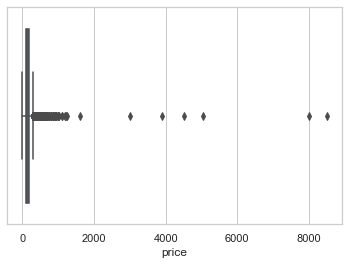

In [159]:
#df = ap_ent[ap_ent['price'] < 250]
sns.boxplot(x=airbnb_model['price'])

In [497]:
# Remove outliers

#outl_pol = airbnb_model[airbnb_model['polarity'] < 0.6]
#outl_pol_2 = outl_pol[outl_pol['polarity'] > 0.1]
outl_com = airbnb_model[airbnb_model['number_of_reviews'] > 0]
outl_0 = outl_com[outl_com['price'] > 0]
outl = outl_0[outl_0['price'] < 235]
outl_1 = outl[outl['accommodates'] < 8]
outl_2 = outl_1[outl_1['bedrooms'] < 4]
outl_3 = outl_2[outl_2['beds'] < 4]
outl_4 = outl_3[outl_3['security_deposit'] < 520]
outl_5 = outl_4[outl_4['cleaning_fee'] < 99]
outl_6 = outl_5[outl_5['guests_included'] < 4]
outl_7 = outl_6[outl_6['minimum_nights'] < 20]

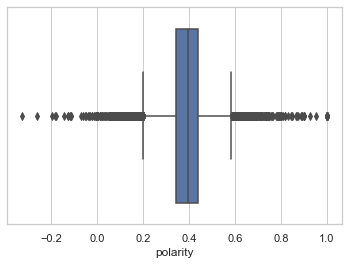

In [161]:
sns.boxplot(x=outl_7['polarity'])

In [498]:
outl_7.shape

(13761, 45)

In [163]:
outl_7.head()

,polarity,description_lenght,neighbourhood,price,host_since,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,Private_entrance,Breakfast,Elevator,Patio_or_balcony,Wifi,Washer,24_hour_check_in,Kitchen,Garden_or_backyard,TV,Bed_linens,Air_conditioning,Essentials,Lockbox,Waterfront
0,0.377925,1000,1,59,733309,1,1,0,0,1,1,2,1,1,2,1,100,50,1,20,3,17,44,44,248,97,1,1,0,0,2,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0
1,0.421428,1000,2,160,733339,0,1,1,1,1,2,5,1,2,2,1,300,40,2,15,4,0,0,47,42,96,0,2,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0
2,0.336916,1000,3,80,733743,0,2,0,1,2,2,2,1,1,1,1,0,0,2,0,1,0,24,198,233,87,0,1,0,0,2,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
3,0.506875,1000,4,125,733731,0,2,0,0,1,2,3,1,1,1,1,300,40,2,10,14,2,44,141,1,100,0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0
4,0.447814,1000,4,150,733854,1,1,1,1,3,1,2,1,1,1,1,0,0,1,0,2,16,54,199,171,99,1,1,0,0,2,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0


# Normalize

In [499]:
min_max_scaler = MinMaxScaler()

scale = min_max_scaler.fit_transform(outl_7[['neighbourhood','description_lenght','host_since',
                                            'host_listings_count', 'property_type', 'room_type', 'accommodates',
                                            'bathrooms', 'bedrooms', 'beds', 'bed_type', 'security_deposit',
                                            'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
                                            'availability_30', 'availability_90', 'availability_365',
                                            'number_of_reviews', 'review_scores_rating',
                                            'cancellation_policy', 'reviews_per_month']])

scale_df = pd.DataFrame(scale, index=outl_7.index, columns=['neighbourhood','description_lenght','host_since',
                                            'host_listings_count', 'property_type', 'room_type', 'accommodates',
                                            'bathrooms', 'bedrooms', 'beds', 'bed_type', 'security_deposit',
                                            'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
                                            'availability_30', 'availability_90', 'availability_365',
                                            'number_of_reviews', 'review_scores_rating',
                                            'cancellation_policy', 'reviews_per_month'])
scale_df = scale_df.reset_index()
scale_df.head()

,index,neighbourhood,description_lenght,host_since,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_90,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,0,0.000000,1.0,0.000000,0.003484,0.000000,0.0,0.166667,0.066667,0.333333,0.666667,0.0,0.2,0.526316,0.0,0.077220,0.111111,0.566667,0.488889,0.120548,0.355908,0.97,0.0,0.181818
1,1,0.047619,1.0,0.008069,0.003484,0.000000,0.5,0.666667,0.066667,0.666667,0.666667,0.0,0.6,0.421053,0.5,0.057915,0.166667,0.000000,0.000000,0.128767,0.059078,0.96,0.5,0.090909
2,2,0.095238,1.0,0.116729,0.006969,0.090909,0.5,0.166667,0.066667,0.333333,0.333333,0.0,0.0,0.000000,0.5,0.000000,0.000000,0.000000,0.266667,0.542466,0.334294,0.87,0.0,0.181818
3,3,0.142857,1.0,0.113502,0.006969,0.000000,0.5,0.333333,0.066667,0.333333,0.333333,0.0,0.6,0.421053,0.5,0.038610,0.722222,0.066667,0.488889,0.386301,0.000000,1.00,0.0,0.000000
4,4,0.142857,1.0,0.146584,0.003484,0.181818,0.0,0.166667,0.066667,0.333333,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.055556,0.533333,0.600000,0.545205,0.244957,0.99,0.0,0.181818


In [500]:
outl_8_drop = outl_7.drop(columns=['neighbourhood','description_lenght','host_since',
                                            'host_listings_count', 'property_type', 'room_type', 'accommodates',
                                            'bathrooms', 'bedrooms', 'beds', 'bed_type', 'security_deposit',
                                            'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
                                            'availability_30', 'availability_90', 'availability_365',
                                            'number_of_reviews', 'review_scores_rating',
                                            'cancellation_policy', 'reviews_per_month'])
outl_8_drop = outl_8_drop.reset_index()

In [501]:
airbnb_scaled = pd.merge(scale_df, outl_8_drop, on='index')

In [502]:
airbnb_scaled = airbnb_scaled.drop(columns='index')

In [505]:
# Move 'price' column to front
airbnb_scaled = airbnb_scaled.set_index('price').reset_index()

In [506]:
airbnb_scaled.head()

,price,neighbourhood,description_lenght,host_since,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_90,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,host_is_superhost,host_identity_verified,is_location_exact,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,Private_entrance,Breakfast,Elevator,Patio_or_balcony,Wifi,Washer,24_hour_check_in,Kitchen,Garden_or_backyard,TV,Bed_linens,Air_conditioning,Essentials,Lockbox,Waterfront
0,59,0.000000,1.0,0.000000,0.003484,0.000000,0.0,0.166667,0.066667,0.333333,0.666667,0.0,0.2,0.526316,0.0,0.077220,0.111111,0.566667,0.488889,0.120548,0.355908,0.97,0.0,0.181818,1,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0
1,160,0.047619,1.0,0.008069,0.003484,0.000000,0.5,0.666667,0.066667,0.666667,0.666667,0.0,0.6,0.421053,0.5,0.057915,0.166667,0.000000,0.000000,0.128767,0.059078,0.96,0.5,0.090909,0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0
2,80,0.095238,1.0,0.116729,0.006969,0.090909,0.5,0.166667,0.066667,0.333333,0.333333,0.0,0.0,0.000000,0.5,0.000000,0.000000,0.000000,0.266667,0.542466,0.334294,0.87,0.0,0.181818,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
3,125,0.142857,1.0,0.113502,0.006969,0.000000,0.5,0.333333,0.066667,0.333333,0.333333,0.0,0.6,0.421053,0.5,0.038610,0.722222,0.066667,0.488889,0.386301,0.000000,1.00,0.0,0.000000,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0
4,150,0.142857,1.0,0.146584,0.003484,0.181818,0.0,0.166667,0.066667,0.333333,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.055556,0.533333,0.600000,0.545205,0.244957,0.99,0.0,0.181818,1,1,1,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0


In [507]:
airbnb_scaled = airbnb_scaled.drop(columns=['beds', 'availability_90', 'require_guest_profile_picture'])

In [508]:
airbnb_scaled.shape

(13761, 42)

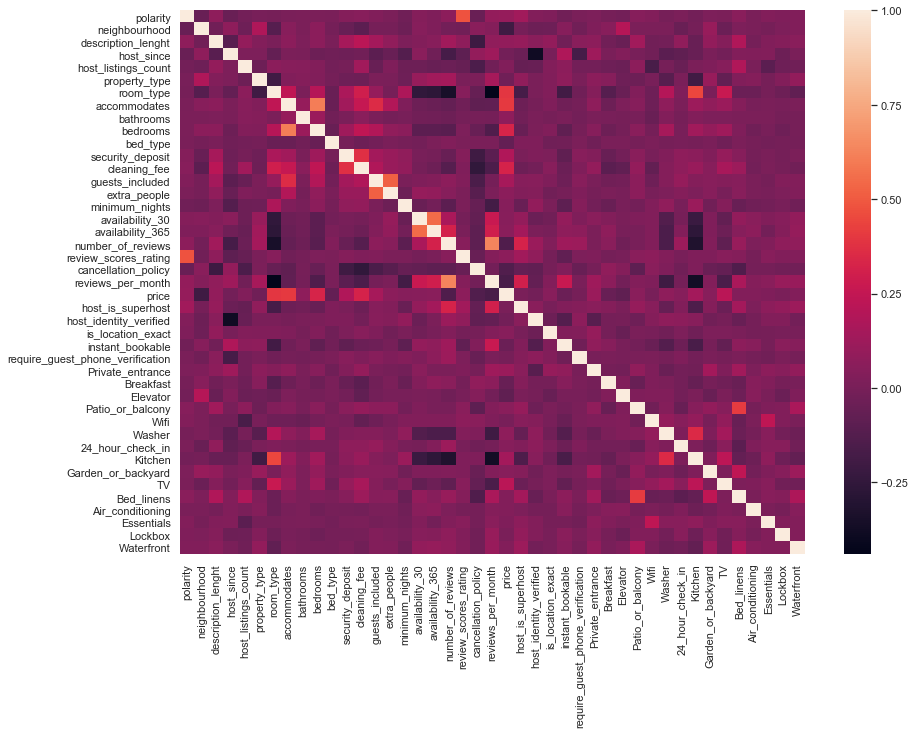

In [129]:
plt.figure(figsize=(14, 10))
sns.heatmap(airbnb_scaled.corr())
plt.savefig("correlation.png")

# Price to 20 categories

In [186]:
price_clas = airbnb_scaled
price_clas.head()

,price,neighbourhood,description_lenght,host_since,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_90,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,host_is_superhost,host_identity_verified,is_location_exact,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,Private_entrance,Breakfast,Elevator,Patio_or_balcony,Wifi,Washer,24_hour_check_in,Kitchen,Garden_or_backyard,TV,Bed_linens,Air_conditioning,Essentials,Lockbox,Waterfront
0,59,0.000000,1.0,0.000000,0.001433,0.000000,0.0,0.166667,0.066667,0.333333,0.666667,0.0,0.2,0.526316,0.0,0.077220,0.111111,0.566667,0.488889,0.120548,0.356835,0.97,0.000000,0.181818,1,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0
1,160,0.047619,1.0,0.008054,0.001433,0.000000,0.5,0.666667,0.066667,0.666667,0.666667,0.0,0.6,0.421053,0.5,0.057915,0.166667,0.000000,0.000000,0.128767,0.060432,0.96,0.333333,0.090909,0,1,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0
2,80,0.095238,1.0,0.116510,0.002865,0.090909,0.5,0.166667,0.066667,0.333333,0.333333,0.0,0.0,0.000000,0.5,0.000000,0.000000,0.000000,0.266667,0.542466,0.335252,0.87,0.000000,0.181818,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
3,125,0.142857,1.0,0.113289,0.002865,0.000000,0.5,0.333333,0.066667,0.333333,0.333333,0.0,0.6,0.421053,0.5,0.038610,0.722222,0.066667,0.488889,0.386301,0.001439,1.00,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0
4,150,0.142857,1.0,0.146309,0.001433,0.181818,0.0,0.166667,0.066667,0.333333,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.055556,0.533333,0.600000,0.545205,0.246043,0.99,0.000000,0.181818,1,1,1,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0


In [187]:
price_clas['price'].unique()

array([ 59, 160,  80, 125, 150,  65,  75,  55, 180, 159, 250, 200, 155,
       140, 225, 115,  90,  72,  87,  60,  86, 100, 145, 179, 109, 116,
       220, 175, 105,  70, 135,  95, 249,  45, 189,  40,  94,  99,  98,
        52,  89,  74, 120,  50, 110,  79, 114, 170, 119, 149, 193, 188,
        73,  96,  85, 169, 164, 117, 126, 195, 124, 107,  88, 190, 129,
       165, 199, 130, 185,  28,  82, 255, 240, 235,  97,  32, 118, 232,
        78,  69, 139, 147, 214, 108, 219, 121, 156,  56, 171, 111, 127,
        29, 133,  47, 198, 239,  76,  38, 210,  57, 132, 172,  93,  92,
       183, 122,  66, 153, 230,  77, 123, 191, 213, 138,  51, 128, 174,
       148, 163, 167, 134, 103, 158, 142,  84, 137, 215, 176,  54, 131,
       245, 112, 106,  64, 177, 201, 209, 101,  46,  48,  62, 217,  81,
        68, 136, 227,  58, 113,  44, 186, 151, 187,  49,  83, 104, 224,
       102, 211,  91, 197,  42, 229, 246,  35, 254, 143,  12, 141,  67,
       248,  30, 152, 178, 247, 161, 182,  37, 233, 205,  39,  5

In [188]:
col = 'price'

conditions = [(price_clas[col] > 0) & (price_clas[col] <= 12),   # 1
             (price_clas[col] > 12) & (price_clas[col] <= 24),   # 2
             (price_clas[col] > 24) & (price_clas[col] <= 36),   # 3
             (price_clas[col] > 36) & (price_clas[col] <= 48),   # 4
             (price_clas[col] > 48) & (price_clas[col] <= 60),   # 5
             (price_clas[col] > 60) & (price_clas[col] <=72),    # 6
             (price_clas[col] > 72) & (price_clas[col] <= 84),   # 7
             (price_clas[col] > 84) & (price_clas[col] <= 96),   # 8
             (price_clas[col] > 96) & (price_clas[col] <= 108),  # 9
             (price_clas[col] > 108) & (price_clas[col] <= 120), # 10
             (price_clas[col] > 120) & (price_clas[col] <= 132), # 11
             (price_clas[col] > 132) & (price_clas[col] <= 144), # 12
             (price_clas[col] > 144) & (price_clas[col] <= 156), # 13
             (price_clas[col] > 156) & (price_clas[col] <= 168), # 14
             (price_clas[col] > 168) & (price_clas[col] <= 180), # 15
             (price_clas[col] > 180) & (price_clas[col] <= 192), # 16
             (price_clas[col] > 192) & (price_clas[col] <= 204), # 17
             (price_clas[col] > 204) & (price_clas[col] <= 216), # 18
             (price_clas[col] > 216) & (price_clas[col] <= 228), # 19
             (price_clas[col] > 228) & (price_clas[col] <= 240), # 20
             price_clas[col] > 240]                              # 21


choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

price_clas["price"] = np.select(conditions, choices, default=np.nan)

In [189]:
price_clas["price"].unique()

array([ 5., 14.,  7., 11., 13.,  6., 15., 21., 17., 12., 19., 10.,  8.,
        9.,  4., 16.,  3., 20., 18.,  1.,  2.])

In [190]:
price_clas["price"] = price_clas["price"].astype(int)

In [128]:
plt.figure(figsize=(16, 16))
sns.heatmap(price_clas.corr())


NameError: name 'price_clas' is not defined

<Figure size 1152x1152 with 0 Axes>

In [368]:
price_clas = price_clas.drop(columns=['beds', 'availability_90', 'require_guest_profile_picture'])

### Regression models

In [113]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    return r2_score(y_true, y_predict)

#### Random Forrest Regressor

In [114]:
y = airbnb_scaled['polarity'] 
X = airbnb_scaled[airbnb_scaled.columns.difference(['polarity'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [123]:
rfr_2 = RandomForestRegressor(max_depth=20).fit(X_train, y_train)
y_pred_train_2 = rfr_2.predict(X_train)
y_pred_test_2 = rfr_2.predict(X_test)
score_train_2 = performance_metric(y_train, y_pred_train_2)

score_test_2 = performance_metric(y_test, y_pred_test_2)

print('\nTrain set',score_train_2, 'Test set', score_test_2)

C:\Users\anete\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Train set 0.7601441924570451 Test set 0.1473378270186777


In [116]:
feature_importance = rfr_2.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())


In [117]:
sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

In [118]:
airbnb_scaled.head(1)

,polarity,neighbourhood,description_lenght,host_since,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,price,host_is_superhost,host_identity_verified,is_location_exact,instant_bookable,require_guest_phone_verification,Private_entrance,Breakfast,Elevator,Patio_or_balcony,Wifi,Washer,24_hour_check_in,Kitchen,Garden_or_backyard,TV,Bed_linens,Air_conditioning,Essentials,Lockbox,Waterfront
0,0.377925,0.0,1.0,0.0,0.003484,0.0,0.0,0.166667,0.066667,0.333333,0.0,0.2,0.526316,0.0,0.07722,0.111111,0.566667,0.120548,0.355908,0.97,0.0,0.181818,59,1,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0


In [119]:
# Feature weights
weights = pd.DataFrame(rfr_2.feature_importances_, columns=['weight'], index=X_train.columns)
weights.sort_values('weight', inplace=True)

In [ ]:
# Feature importance

plt.figure(figsize=(8,20))
plt.barh(weights.index, weights.weight, align='center') 
plt.title("Feature importances model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
#plt.savefig("feature importances.png")
#plt.show()

#### LinearRegression

In [132]:
from sklearn.linear_model import LinearRegression

y = airbnb_scaled['polarity'] 
X = airbnb_scaled[airbnb_scaled.columns.difference(['polarity'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression().fit(X_train, y_train)

In [133]:
y_pred = regressor.predict(X_test)

test_set_r2 = r2_score(y_test, y_pred)
print('R-squared:',test_set_r2)

R-squared: 0.2742089809328969


In [ ]:
plt.figure(figsize=(8,20))
plt.barh(weights.index, weights.weight, align='center') 
plt.title("Feature importances model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
#plt.savefig("feature importances.png")
plt.show()

# KERAS

#### Polarity

In [304]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [62]:
airbnb_scaled.head()

,polarity,neighbourhood,description_lenght,host_since,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,price,host_is_superhost,host_identity_verified,is_location_exact,instant_bookable,require_guest_phone_verification,Private_entrance,Breakfast,Elevator,Patio_or_balcony,Wifi,Washer,24_hour_check_in,Kitchen,Garden_or_backyard,TV,Bed_linens,Air_conditioning,Essentials,Lockbox,Waterfront
0,0.377925,0.000000,1.0,0.000000,0.003484,0.000000,0.0,0.166667,0.066667,0.333333,0.0,0.2,0.526316,0.0,0.077220,0.111111,0.566667,0.120548,0.355908,0.97,0.0,0.181818,59,1,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,0,1,0,0
1,0.421428,0.047619,1.0,0.008069,0.003484,0.000000,0.5,0.666667,0.066667,0.666667,0.0,0.6,0.421053,0.5,0.057915,0.166667,0.000000,0.128767,0.059078,0.96,0.5,0.090909,160,0,1,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0
2,0.336916,0.095238,1.0,0.116729,0.006969,0.090909,0.5,0.166667,0.066667,0.333333,0.0,0.0,0.000000,0.5,0.000000,0.000000,0.000000,0.542466,0.334294,0.87,0.0,0.181818,80,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0
3,0.506875,0.142857,1.0,0.113502,0.006969,0.000000,0.5,0.333333,0.066667,0.333333,0.0,0.6,0.421053,0.5,0.038610,0.722222,0.066667,0.386301,0.000000,1.00,0.0,0.000000,125,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0
4,0.447814,0.142857,1.0,0.146584,0.003484,0.181818,0.0,0.166667,0.066667,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.055556,0.533333,0.545205,0.244957,0.99,0.0,0.181818,150,1,1,1,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0


In [63]:
#airbnb_scaled = airbnb_scaled.drop(columns='review_scores_rating')

In [324]:
airbnb_scaled.shape

(13534, 43)

In [357]:
# Convert data to numpy arrays
dataset = airbnb_scaled.values

In [369]:
Y = dataset[:,0]
X = dataset[:,1:]

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.2)

# split 'X_val_and_test' and 'Y_val_and_test'
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(10827, 42) (1353, 42) (1354, 42) (10827,) (1353,) (1354,)


In [370]:
model_3 = Sequential([
    Dense(128, activation='relu', input_shape=(42,)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1, activation='linear')
])

In [371]:
# telling which algorithm use for optimization, what function to use for loss optimization

model_3.compile(optimizer='adam',
              loss='mse',
              metrics=['mean_absolute_error'])

#print(model_3.summary())

In [372]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=500, epochs=30,
          validation_data=(X_val, Y_val))

Train on 10827 samples, validate on 1353 samples
Epoch 1/30
10827/10827 [==============================] - 1s 96us/step - loss: 20.6702 - mean_absolute_error: 3.4043 - val_loss: 4.6448 - val_mean_absolute_error: 2.0033
Epoch 2/30
10827/10827 [==============================] - 0s 17us/step - loss: 1.0233 - mean_absolute_error: 0.7991 - val_loss: 0.0394 - val_mean_absolute_error: 0.1749
Epoch 3/30
10827/10827 [==============================] - 0s 16us/step - loss: 0.0551 - mean_absolute_error: 0.1833 - val_loss: 0.0199 - val_mean_absolute_error: 0.1097
Epoch 4/30
10827/10827 [==============================] - 0s 16us/step - loss: 0.0220 - mean_absolute_error: 0.1143 - val_loss: 0.0143 - val_mean_absolute_error: 0.0910
Epoch 5/30
10827/10827 [==============================] - 0s 16us/step - loss: 0.0156 - mean_absolute_error: 0.0937 - val_loss: 0.0128 - val_mean_absolute_error: 0.0856
Epoch 6/30
10827/10827 [==============================] - 0s 16us/step - loss: 0.0136 - mean_absolute_err

In [373]:
from keras.utils import plot_model

plot_model(model_3, show_shapes=True, show_layer_names=False, to_file='polarity_pred.png')

Text(0.5, 0, '\nActual')

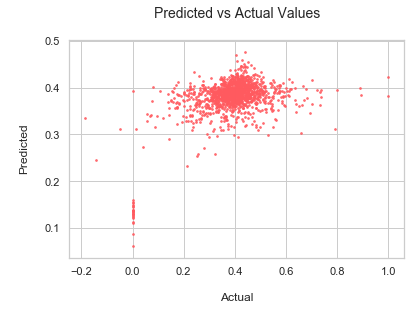

In [374]:
y_test_pred = model_3.predict(X_test)
plt.scatter(Y_test, y_test_pred, s=3, facecolor='#FF5A5F', alpha=0.8)
#plt.plot(list(range(0,1)), list(range(0,1)), color='red',  linewidth=1, linestyle='--')
plt.title('Predicted vs Actual Values\n', fontsize=14)
plt.ylabel('\nPredicted\n')
plt.xlabel('\nActual')

In [405]:
_, train_mean_absolute_error = model_3.evaluate(X_train, Y_train)
_, test_mean_absolute_error = model_3.evaluate(X_test, Y_test)

#_, train_mean_absolute_error = model.evaluate(X_train, Y_train)
#_, test_mean_absolute_error = model.evaluate(X_test, Y_test)

print('Train MAE:', train_mean_absolute_error,
      'Test MAE:', test_mean_absolute_error)

1354/1354 [==============================] - 0s 32us/step
Train MAE: 0.06653498858213425 Test MAE: 0.06980962306261063


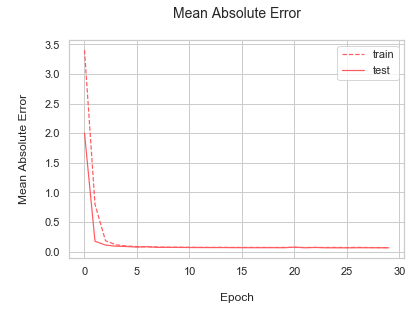

In [401]:
# plot mean_absolute_error

plt.title('Mean Absolute Error\n', fontsize=14)
plt.plot(hist_3.history['mean_absolute_error'], label='train', color='#FF5A5F', linewidth=1.2, linestyle='--')
plt.plot(hist_3.history['val_mean_absolute_error'], label='test', color='#FF5A5F', linewidth=1.2)
#plt.ylabel('Mean Absolute Error')
plt.xlabel('\nEpoch')
plt.ylabel('\nMean Absolute Error\n')
plt.legend()
plt.show()

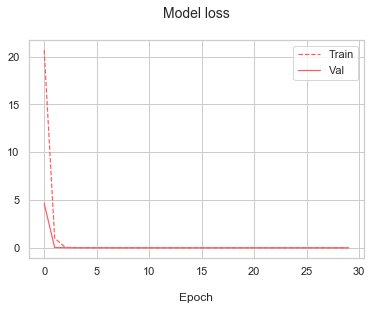

In [402]:
# visualize the training loss and the validation loss

plt.plot(hist_3.history['loss'], color='#FF5A5F', linewidth=1.2, linestyle='--')
plt.plot(hist_3.history['val_loss'], color='#FF5A5F', linewidth=1.2)
plt.title('Model loss\n', fontsize=14)
#plt.ylabel('Loss')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [403]:
x = model_3.predict(X_test)
print(x[22])

#percentage = test_mean_absolute_error/123.69633733456448 * 100
#percentage


[0.39176172]


In [404]:
Y_test[22]

0.3329564086706944

#### Price

In [509]:
airbnb_scaled.shape

(13761, 42)

In [510]:
airbnb_scaled.price.mean()

120.12375554102172

In [523]:
# Convert data to numpy arrays
dataset = airbnb_scaled.values

In [524]:
Y = dataset[:,0]
X = dataset[:,1:]

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.2)

# split 'X_val_and_test' and 'Y_val_and_test'
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(11008, 41) (1376, 41) (1377, 41) (11008,) (1376,) (1377,)


In [525]:
model_num= Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.005), input_shape=(41,)),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.005)),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.005)),
    Dropout(0.3),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.005)),
    Dropout(0.3),
    Dense(1, activation='relu', kernel_regularizer=regularizers.l1(0.005)),
])

In [526]:
model_num.compile(optimizer='adam',
              loss='mse',
              metrics=['mse', 'mean_absolute_error'])

#print(model_num.summary())

In [527]:
hist_num = model_num.fit(X_train, Y_train,
          batch_size=500, epochs=50,
          validation_data=(X_val, Y_val))

Train on 11008 samples, validate on 1376 samples
Epoch 1/50
11008/11008 [==============================] - 2s 197us/step - loss: 9500.8698 - mse: 9441.5693 - mean_absolute_error: 83.8302 - val_loss: 1596.2289 - val_mse: 1537.1852 - val_mean_absolute_error: 32.3341
Epoch 2/50
11008/11008 [==============================] - 0s 38us/step - loss: 2023.0557 - mse: 1964.8107 - mean_absolute_error: 34.9628 - val_loss: 1506.1590 - val_mse: 1448.8109 - val_mean_absolute_error: 29.6136
Epoch 3/50
11008/11008 [==============================] - 0s 35us/step - loss: 1705.9956 - mse: 1649.3739 - mean_absolute_error: 32.2089 - val_loss: 1398.2873 - val_mse: 1342.5004 - val_mean_absolute_error: 28.5337
Epoch 4/50
11008/11008 [==============================] - 0s 35us/step - loss: 1556.5508 - mse: 1501.3741 - mean_absolute_error: 30.8164 - val_loss: 1284.0424 - val_mse: 1229.5372 - val_mean_absolute_error: 27.6581
Epoch 5/50
11008/11008 [==============================] - 0s 35us/step - loss: 1486.7034 -

Epoch 39/50
11008/11008 [==============================] - 0s 42us/step - loss: 1236.8185 - mse: 1192.3024 - mean_absolute_error: 26.9949 - val_loss: 1143.7884 - val_mse: 1099.2865 - val_mean_absolute_error: 25.8268
Epoch 40/50
11008/11008 [==============================] - 0s 41us/step - loss: 1240.2928 - mse: 1195.8727 - mean_absolute_error: 27.1395 - val_loss: 1218.7299 - val_mse: 1174.3877 - val_mean_absolute_error: 26.2678
Epoch 41/50
11008/11008 [==============================] - 0s 40us/step - loss: 1235.2553 - mse: 1190.9672 - mean_absolute_error: 27.0178 - val_loss: 1309.7271 - val_mse: 1265.5168 - val_mean_absolute_error: 27.0380
Epoch 42/50
11008/11008 [==============================] - 0s 42us/step - loss: 1219.1317 - mse: 1174.9149 - mean_absolute_error: 26.7605 - val_loss: 1183.2754 - val_mse: 1139.0750 - val_mean_absolute_error: 25.9424
Epoch 43/50
11008/11008 [==============================] - 0s 40us/step - loss: 1203.0321 - mse: 1158.8538 - mean_absolute_error: 26.659

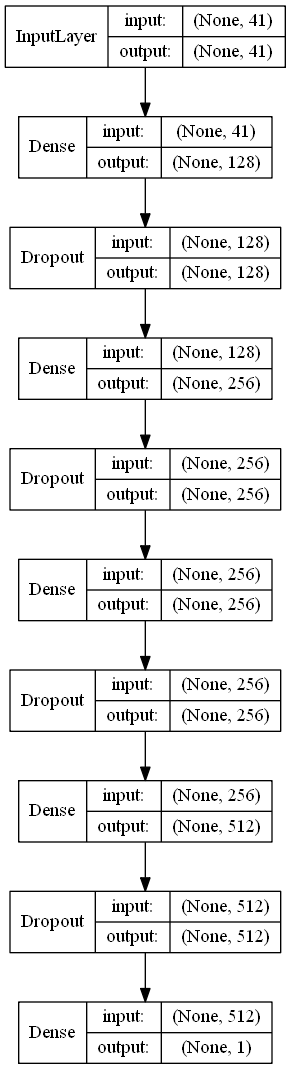

In [542]:
from keras.utils import plot_model

#SVG(model_to_dot(model_num,  show_shapes=True, show_layer_names=False).create(prog='dot', format='svg'))
plot_model(model_num, show_shapes=True, show_layer_names=False, to_file='full_scaled_2.png')


Text(0.5, 1.0, 'Price distribution\n')

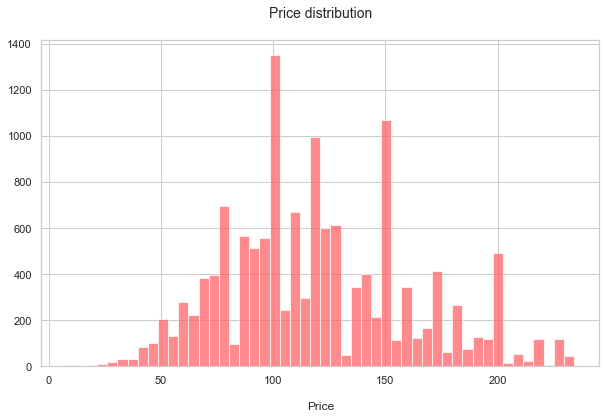

In [537]:
#sns.distplot(airbnb_scaled.price, color='#FF5A5F')
#plt.title('Price distribution\n', fontsize=14)
#plt.xlabel('\nPrice (USD)')

plt.figure(figsize=(10,6))
plt.hist(airbnb_scaled['price'],bins=50, color='#FF5A5F', alpha=0.7)
plt.ylabel('')
plt.xlabel('\nPrice')
plt.title('Price distribution\n', fontsize=14)

Text(0.5, 0, '\nActual')

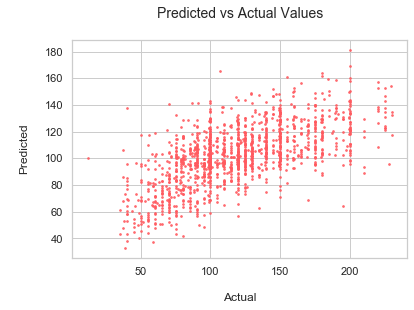

In [529]:
y_test_pred = model_num.predict(X_test)
plt.scatter(Y_test, y_test_pred, s=3, alpha=0.8, color='#FF5A5F')
plt.title('Predicted vs Actual Values\n', fontsize=14)
#plt.plot(list(range(5,200)), list(range(5,200)), color='green',  linewidth=1.2, linestyle='--')
plt.ylabel('\nPredicted\n')
plt.xlabel('\nActual')
#plt.savefig("predicted_vs_actual.png")



In [533]:
_, mse, train_mean_absolute_error = model_num.evaluate(X_train, Y_train)
_, mse, test_mean_absolute_error = model_num.evaluate(X_test, Y_test)

#_, train_mean_absolute_error = model.evaluate(X_train, Y_train)
#_, test_mean_absolute_error = model.evaluate(X_test, Y_test)

print('Train MAE:', train_mean_absolute_error,
      'Test MAE:', test_mean_absolute_error)

1377/1377 [==============================] - 0s 46us/step
Train MAE: 27.48365592956543 Test MAE: 27.475175857543945


In [530]:
# plot mean_squared_error
"""
plt.title('Mean Squared Error per Epoch\n', fontsize=14)
plt.plot(hist_num.history['mse'], label='train', color='red', linewidth=1, linestyle='--')
plt.plot(hist_num.history['val_mse'], label='test', color='r', linewidth=2)
plt.ylabel('\nMean Squared Error')
plt.xlabel('\nEpoch')
plt.legend()
plt.show()
"""

"\nplt.title('Mean Squared Error per Epoch\n', fontsize=14)\nplt.plot(hist_num.history['mse'], label='train', color='red', linewidth=1, linestyle='--')\nplt.plot(hist_num.history['val_mse'], label='test', color='r', linewidth=2)\nplt.ylabel('\nMean Squared Error')\nplt.xlabel('\nEpoch')\nplt.legend()\nplt.show()\n"

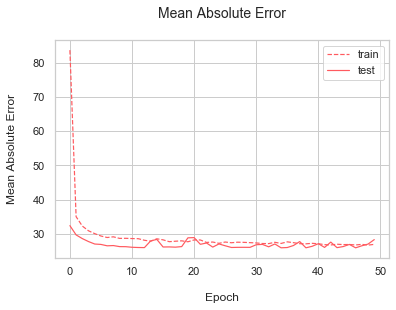

In [532]:
# plot mean_absolute_error

plt.title('Mean Absolute Error\n', fontsize=14)
plt.plot(hist_num.history['mean_absolute_error'], label='train', color='#FF5A5F', linewidth=1.2, linestyle='--')
plt.plot(hist_num.history['val_mean_absolute_error'], label='test', color='#FF5A5F', linewidth=1.2)
plt.ylabel('Mean Absolute Error\n')
plt.xlabel('\nEpoch')
plt.legend()
plt.show()

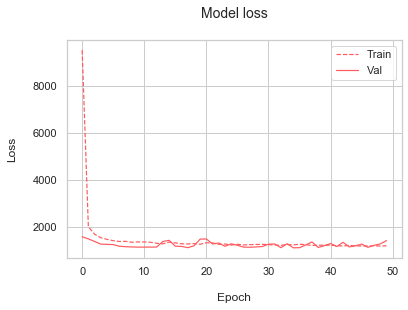

In [541]:
# visualize the training loss and the validation loss

plt.plot(hist_num.history['loss'], color='#FF5A5F', linewidth=1.2, linestyle='--')
plt.plot(hist_num.history['val_loss'], color='#FF5A5F', linewidth=1.2)
plt.title('Model loss\n', fontsize=14)
plt.ylabel('Loss\n')
plt.xlabel('\nEpoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [697]:
x = model_3.predict(X_test)
print(x[50])

percentage = test_mean_absolute_error/114.8 * 100
percentage


[12.631609]


1.9517808841080615

In [698]:
Y_test[50]

80.0